<h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px; color:#000;" align="center">SCHOOL DROPOUT IN SOGAMOSO</h1>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 24px; color:#000;" align="center">| MODELING Notebook |</p>
<p style="width: 100%; text-align: center; margin: 0px; padding: 0px; font-size: 20px; color:#000;" align="center">Correlation One - DS4A</p>
<p style="text-align:center;">This notebook contains the <b>MODELING</b> of the machine learning algorithms based on the selected features.</p>

## 1. Libraries

In [165]:
# General
import timeit
from collections import Counter
import pandas as pd
import numpy as np
from numpy import sqrt 
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn ligrary
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                    KFold, cross_validate, HalvingGridSearchCV)
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import (StandardScaler, OneHotEncoder,
                                   OrdinalEncoder, FunctionTransformer)
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                              IsolationForest)
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score,
                             f1_score, precision_score, ConfusionMatrixDisplay,
                             roc_curve, precision_recall_curve, classification_report)
from sklearn.inspection import permutation_importance

# XGBoost ligrary
from xgboost import XGBClassifier

# Imbalanced-learn ligrary
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

## SHapley Additive exPlanations.
import shap

# Own specific functions 
from functions import *

## 2. Importing files

In [2]:
df_students = pd.read_csv("datasets/df_students.csv")

In [3]:
df_analysis(df_students, key_columns=["PER_ID_AÑO"], analysis_type="complete")


Analysis header
--------------------------------------------------------------------------------
- Dataset shape:			 311866 rows and 35 columns
- Total of NaN values:			 183550
- Percentage of NaN:			 1.68 %
- Total of infinite values:		 0
- Total of empty columns:		 0
- Total of empty rows:			 0
- Total of full duplicates rows:	 0
- Unique indexes:			 True
- Memory usage:				 83.3+ MB

- The key(s):	 ['PER_ID_AÑO'] is not present multiple times in the dataframe. 
		 It CAN be used as a primary key.


Detailed analysis
--------------------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,AÑO,int64,311866,10,0,0.00000,2017.44093,2013.00000,2015.00000,2017.00000,2020.00000,2022.00000,2.88220
1,INSTITUCION,object,311866,76,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,INSTITUCION_ESPECIALIDAD_NO_APLICA,int64,311866,2,0,0.00000,0.38291,0.00000,0.00000,0.00000,1.00000,1.00000,0.48610
32,INSTITUCION_ESPECIALIDAD_INDUSTRIAL,int64,311866,2,0,0.00000,0.63968,0.00000,0.00000,1.00000,1.00000,1.00000,0.48010
31,INSTITUCION_ESPECIALIDAD_COMERCIAL,int64,311866,2,0,0.00000,0.00878,0.00000,0.00000,0.00000,0.00000,1.00000,0.09327
30,INSTITUCION_ESPECIALIDAD_AGROPECUARIO,int64,311866,2,0,0.00000,0.07492,0.00000,0.00000,0.00000,0.00000,1.00000,0.26327
29,INSTITUCION_ESPECIALIDAD_ACADÉMICA,int64,311866,2,0,0.00000,0.90453,0.00000,1.00000,1.00000,1.00000,1.00000,0.29386
28,INSTITUCION_NIVEL_PRIMERA_INFANCIA,int64,311866,2,0,0.00000,0.10307,0.00000,0.00000,0.00000,0.00000,1.00000,0.30405
27,INSTITUCION_NIVEL_PREESCOLAR,int64,311866,2,0,0.00000,0.96091,0.00000,1.00000,1.00000,1.00000,1.00000,0.19382
26,INSTITUCION_NIVEL_MEDIA,int64,311866,2,0,0.00000,0.94293,0.00000,1.00000,1.00000,1.00000,1.00000,0.23198


## 3. Analyzing target variable

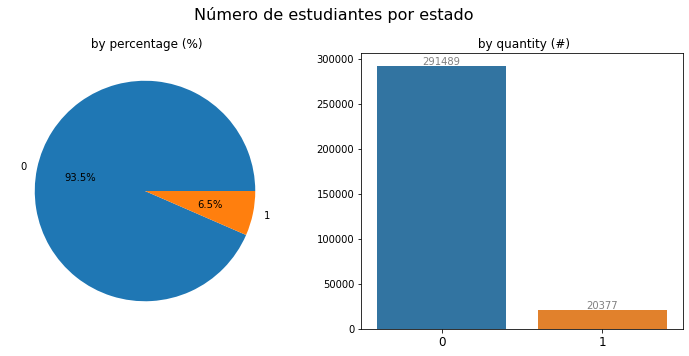

In [4]:
barplot_and_pie(df_students["ESTADO"], "Número de estudiantes por estado", "")

<div class="alert alert-block alert-warning">
    <p><b>Observations</b></p>
    <p>Based on the plot, we can say that we are facing an imbalanced classification problem</p>

</div>

## 4. Splitting data

Before to split data, we are going to transform the feature `EDAD` to treat the outlierts inside it. 

In [5]:
def age_clasification(age):
    if 0 <= age <= 5:
        new_age = "0-5"
    if 6 <= age <= 10:
        new_age = "6-10"
    if 11 <= age <= 15:
        new_age = "11-15"
    if 16 <= age <= 20:
        new_age = "16-20"
    if 21 <= age <= 25:
        new_age = "21-25"
    if 26 <= age:
        new_age = "26+"
    return new_age

In [6]:
df_students["EDAD_CLASIFICACION"] = df_students["EDAD"].apply(age_clasification)

Now, we are going to separate the data to predict (2022) from the data to do the training (from 2013 to 2021)

In [7]:
df_students_2022 = df_students[df_students["AÑO"]==2022].copy()
df_students_2022["ESTADO"] = np.NaN

df_students = df_students[df_students["AÑO"]!=2022].copy()

Now, we are let's identify the training columns in the dataset

In [8]:
NOT_TRAINING_COLUMNS = [
    "ESTADO", "AÑO", "PER_ID_AÑO", "PER_ID", "EDAD", "INSTITUCION_LATITUDE", "INSTITUCION_LONGITUD",
]

TRAINING_COLUMNS = [col for col in df_students if col not in NOT_TRAINING_COLUMNS]

Let's proced to split the data

In [9]:
X = df_students[TRAINING_COLUMNS].copy()

In [10]:
y_target = df_students.loc[:, "ESTADO"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2,
                                                    stratify=y_target, random_state=42)

In [12]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print(30*"-")
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (224949, 29)
y_train: (224949,)
------------------------------
X_test: (56238, 29)
y_test: (56238,)


## 5. Data preprocessing

In [13]:
def boolean_transformation(X):
    return X.astype(int)

In [14]:
X_train.columns

Index(['INSTITUCION', 'GENERO', 'GRADO_COD', 'JORNADA', 'ESTRATO',
       'PAIS_ORIGEN', 'DISCAPACIDAD', 'SRPA', 'INSTITUCION_SECTOR',
       'INSTITUCION_MODELO', 'INSTITUCION_APOYO_ACADEMICO_ESPECIAL',
       'INSTITUCION_ZONA', 'INSTITUCION_CARACTER',
       'INSTITUCION_NUMERO_DE_SEDES', 'INSTITUCION_ESTADO',
       'INSTITUCION_PRESTADOR_DE_SERVICIO', 'INSTITUCION_TAMAÑO',
       'INSTITUCION_NIVEL_BASICA_PRIMARIA',
       'INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA', 'INSTITUCION_NIVEL_MEDIA',
       'INSTITUCION_NIVEL_PREESCOLAR', 'INSTITUCION_NIVEL_PRIMERA_INFANCIA',
       'INSTITUCION_ESPECIALIDAD_ACADÉMICA',
       'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
       'INSTITUCION_ESPECIALIDAD_COMERCIAL',
       'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
       'INSTITUCION_ESPECIALIDAD_NO_APLICA', 'INSTITUCION_ESPECIALIDAD_OTRO',
       'EDAD_CLASIFICACION'],
      dtype='object')

In [15]:
CATEGORICAL_FEATURES = [
    "INSTITUCION", "GENERO", "JORNADA", "PAIS_ORIGEN", "DISCAPACIDAD", "SRPA", "INSTITUCION_SECTOR",
    "INSTITUCION_MODELO", "INSTITUCION_APOYO_ACADEMICO_ESPECIAL", "INSTITUCION_ZONA", "INSTITUCION_CARACTER",
    "INSTITUCION_ESTADO", "INSTITUCION_PRESTADOR_DE_SERVICIO"
]
ORDINAL_FEATURES = [
    "ESTRATO", "INSTITUCION_TAMAÑO"
]
ORDINAL_FEATURES = [
    "EDAD_CLASIFICACION", "GRADO_COD", "ESTRATO", "INSTITUCION_TAMAÑO"
]
NUMERICAL_FEATURES = [
    "INSTITUCION_NUMERO_DE_SEDES"
]
BOOLEAN_FEATURES = [
    "INSTITUCION_NIVEL_BASICA_PRIMARIA", "INSTITUCION_NIVEL_SECUNDARIA_PRIMARIA", "INSTITUCION_NIVEL_MEDIA",
    "INSTITUCION_NIVEL_PREESCOLAR", "INSTITUCION_NIVEL_PRIMERA_INFANCIA", "INSTITUCION_ESPECIALIDAD_ACADÉMICA", 
    "INSTITUCION_ESPECIALIDAD_AGROPECUARIO", "INSTITUCION_ESPECIALIDAD_COMERCIAL", 
    "INSTITUCION_ESPECIALIDAD_INDUSTRIAL", "INSTITUCION_ESPECIALIDAD_NO_APLICA",
    "INSTITUCION_ESPECIALIDAD_OTRO"
]

In [16]:
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

ordinal_pipeline = make_pipeline(OrdinalEncoder(categories=[
    ["0-5", "6-10", "11-15", "16-20", "21-25", "26+"],
    [-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0],
    ['ESTRATO 0', 'ESTRATO 1', 'ESTRATO 2', 'ESTRATO 3', 'ESTRATO 4', 'ESTRATO 5', 'ESTRATO 6'],
    ['Pequeña', 'Mediana',  'Grande']
]))

numerical_pipeline = make_pipeline(StandardScaler())

boolean_pipeline = make_pipeline(FunctionTransformer(boolean_transformation))

In [17]:
preprocessor = make_column_transformer(
    (categorical_pipeline, CATEGORICAL_FEATURES),
    (ordinal_pipeline, ORDINAL_FEATURES),
    (numerical_pipeline, NUMERICAL_FEATURES),
    (boolean_pipeline, BOOLEAN_FEATURES)
)

## 6. Modelisation initial

we are going to use five models

- Logistic Regression
- Random Forest
- Gradient Boosting
- XGBoost 
- Isolation Forest

Also, we are going to use a Dummy Classifier as a baseline to compare the models

We are going to use Stratified K-Folds cross-validator to ensure that each fold of dataset has the same proportion of observations with a given label

In [18]:
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

Metrics to use.

In [19]:
scorings = ["roc_auc", "recall", "f1"]

In [20]:
classifiers = {
    "Dummy Classifier" : DummyClassifier(),
    "Logistic Regressions" : LogisticRegressionCV(max_iter=3000),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()
}

In [21]:
# List of metrics results for each models 
LIST_MODEL, LIST_RECALL, LIST_ROC_AUC, LIST_F1, LIST_DURATION  = ([] for i in range(5))

for key, model in classifiers.items():

    start_time_model = timeit.default_timer()
    
    clf = make_pipeline(preprocessor, model)
    
    scores = cross_validate(clf, X_train, y_train, 
                            cv=stratified_kfold, scoring=scorings,  
                            n_jobs=-1)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Adding results into LIST
    LIST_MODEL.append(key)
    LIST_RECALL.append(round(scores.get("test_recall").mean(), 3))
    LIST_ROC_AUC.append(round(scores.get("test_roc_auc").mean(), 3))
    LIST_F1.append(round(scores.get("test_f1").mean(), 3))
    LIST_DURATION.append(end_time_model)

In [22]:
df_initial_models = pd.DataFrame({
    "Model" : LIST_MODEL,
    "ROC-AUC" : LIST_ROC_AUC,
    "Recall" : LIST_RECALL,    
    "F1" : LIST_F1,
    "Duration" : LIST_DURATION,
})

# transforming duration to minutes
df_initial_models["Duration"] = round(df_initial_models["Duration"]/60, 1)

df_initial_models

,Model,ROC-AUC,Recall,F1,Duration
0,Dummy Classifier,0.500,0.000,0.000,0.1
1,Logistic Regressions,0.655,0.000,0.000,3.7
2,Random Forest,0.707,0.147,0.228,3.7
3,Gradient Boosting,0.744,0.051,0.096,0.6
4,XGBoost,0.761,0.117,0.199,0.4


In [23]:
df_models_metrics_reduced = pd.melt(df_initial_models, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_reduced.head()

,Model,Metric,Value
0,Dummy Classifier,ROC-AUC,0.500
1,Logistic Regressions,ROC-AUC,0.655
2,Random Forest,ROC-AUC,0.707
3,Gradient Boosting,ROC-AUC,0.744
4,XGBoost,ROC-AUC,0.761


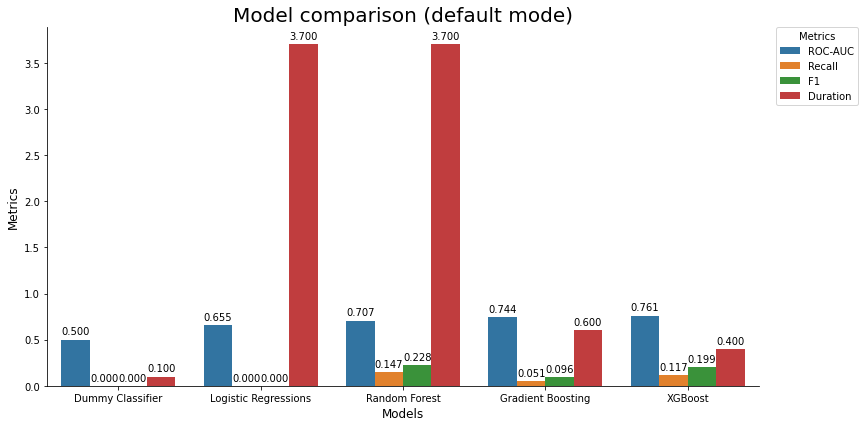

In [24]:
fig, ax1 = plt.subplots(figsize=(12, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_reduced, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Model comparison (default mode)", size=20)
plt.legend(bbox_to_anchor=(1.14, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Models", size=12)
plt.ylabel("Metrics", size=12)
sns.despine(fig)

<div class="admonition warning alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Observations / Conclusions</p>
<p class="last">Using only default mode for all models excepts Isolation Forest, we can notice that all models have obtained better results compared to Dummy Classifier.<br>In addition, the XGBoost has obtained the best result in less time
</p>
</div>

## 7. Hyperparameters Tuning

For reasons of processing cost, we are going to tune the models with a subsample of the data.
Done this, we will proceed to continue the modeling with the parameters obtained.

### 7.1. Subsample of the data

In [25]:
df_subsample = df_students.copy()
df_subsample = df_subsample.sample(frac=0.4)

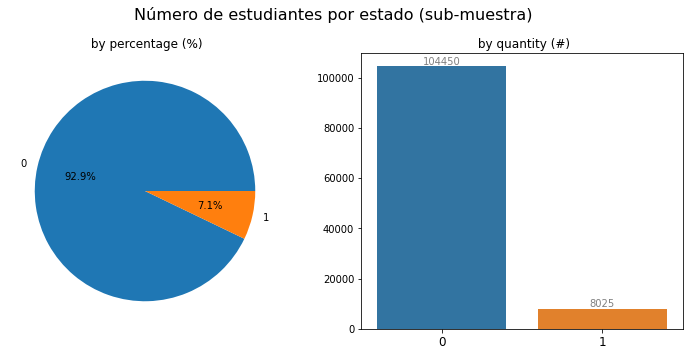

In [26]:
barplot_and_pie(df_subsample["ESTADO"], "Número de estudiantes por estado (sub-muestra)", "")

Now, we are going to split the subsample of the data to tune the models

In [27]:
X_ss = df_subsample[TRAINING_COLUMNS]

In [28]:
y_target_ss = df_subsample.loc[:,"ESTADO"]

In [29]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(X_ss, y_target_ss, test_size=0.20, stratify=y_target_ss, random_state=42)

In [30]:
print("X_train_ss: {}".format(X_train_ss.shape))
print("y_train_ss: {}".format(y_train_ss.shape))
print(30*"-")
print("X_test_ss: {}".format(X_test_ss.shape))
print("y_test_ss: {}".format(y_test_ss.shape))

X_train_ss: (89980, 29)
y_train_ss: (89980,)
------------------------------
X_test_ss: (22495, 29)
y_test_ss: (22495,)


### 7.2. Logistic Regresion

In [31]:
lr = LogisticRegressionCV()
clf = make_pipeline(preprocessor, lr)

sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [32]:
param_grid = {
    "logisticregressioncv__max_iter" : [2000, 3000, 4000, 5000, 6000, 7000, 8000],
    # "logisticregressioncv__penalty" : ["l1", "l2"]
}

In [33]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [34]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_AGROPECUARIO',
                                                                                 'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('logisticregressioncv',
                                               LogisticRegressionCV())]),
                    n_jobs=-1,
                    param_grid={'logisticregressioncv__max_iter': [2000, 3000,
                                                                   4000, 5000,
                                                                   6000, 7000,
                                                                   8000]},
                    scoring='roc_auc')

In [35]:
search.best_params_

{'logisticregressioncv__max_iter': 6000}

In [36]:
lr_parameters = search.best_params_

In [37]:
search.best_score_

0.6403596318807177

### 7.3. Random Forest

In [38]:
rfc = RandomForestClassifier()
clf = make_pipeline(preprocessor, rfc)

sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [39]:
param_grid = {
    "randomforestclassifier__n_estimators" : np.arange(500, 900, 100),
    "randomforestclassifier__max_depth" : np.arange(20, 30, 2)
}

In [40]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [41]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_COMERCIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('randomforestclassifier',
                                               RandomForestClassifier())]),
                    n_jobs=-1,
                    param_grid={'randomforestclassifier__max_depth': array([20, 22, 24, 26, 28]),
                                'randomforestclassifier__n_estimators': array([500, 600, 700, 800])},
                    scoring='roc_auc')

In [42]:
search.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 700}

In [43]:
rfm_parameters = search.best_params_

In [44]:
search.best_score_

0.7238960806604182

### 7.4. Gradient Boosting

In [45]:
gbc = GradientBoostingClassifier()
clf = make_pipeline(preprocessor, gbc)

sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [46]:
param_grid = {
    "gradientboostingclassifier__n_estimators" : np.arange(5, 10, 500),
    "gradientboostingclassifier__max_depth": np.arange( 3, 5, 15),
    "gradientboostingclassifier__learning_rate": np.arange(0.01, 0.1, 10)
}

In [47]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [48]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                                                 'INSTITUCION_ESPECIALIDAD_INDUSTRIAL',
                                                                                 'INSTITUCION_ESPECIALIDAD_NO_APLICA',
                                                                                 'INSTITUCION_ESPECIALIDAD_OTRO'])])),
                                              ('gradientboostingclassifier',
                                               GradientBoostingClassifier())]),
                    n_jobs=-1,
                    param_grid={'gradientboostingclassifier__learning_rate': array([0.01]),
                                'gradientboostingclassifier__max_depth': array([3]),
                                'gradientboostingclassifier__n_estimators': array([5])},
                    scoring='roc_auc')

In [49]:
search.best_params_

{'gradientboostingclassifier__learning_rate': 0.01,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 5}

In [50]:
gbc_parameters = search.best_params_

In [51]:
search.best_score_

0.6718396937361856

### 7.5. XGBoost

In [52]:
xbgc = XGBClassifier()
clf = make_pipeline(preprocessor, xbgc)

sorted(clf.get_params().keys())

['columntransformer',
 'columntransformer__n_jobs',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__onehotencoder',
 'columntransformer__pipeline-1__onehotencoder__categories',
 'columntransformer__pipeline-1__onehotencoder__drop',
 'columntransformer__pipeline-1__onehotencoder__dtype',
 'columntransformer__pipeline-1__onehotencoder__handle_unknown',
 'columntransformer__pipeline-1__onehotencoder__max_categories',
 'columntransformer__pipeline-1__onehotencoder__min_frequency',
 'columntransformer__pipeline-1__onehotencoder__sparse',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__ordinalencoder',
 'columntransformer__pipeline-2__ordinalencoder__categories',
 'columntransformer__pipeline-2__ordinalencoder__dtype',
 'columntransformer__pipeline-2__ordinalencoder__encoded_missing_value'

In [53]:
param_grid = {
    "xgbclassifier__min_child_weight" : [1, 5, 10],
    "xgbclassifier__gamma" : [0.5, 1, 1.5, 2, 5],
    "xgbclassifier__subsample" : [0.6, 0.8, 1.0],
    "xgbclassifier__colsample_bytree" : [0.6, 0.8, 1.0],
    "xgbclassifier__max_depth" : np.arange( 3, 5, 15),
}

In [54]:
search = HalvingGridSearchCV(clf, param_grid, scoring="roc_auc", 
                             cv=stratified_kfold, n_jobs=-1)

In [55]:
search.fit(X_train_ss, y_train_ss)

HalvingGridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('columntransformer',
                                               ColumnTransformer(transformers=[('pipeline-1',
                                                                                Pipeline(steps=[('onehotencoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                ['INSTITUCION',
                                                                                 'GENERO',
                                                                                 'JORNADA',
                                                                                 'PAIS_ORIGEN',
                                                                                 'DISCAPACIDAD',
                                                                                 'SRPA',
                                                                                 'INSTITUCION_SECTOR',
                                                                                 'INSTITUCIO...
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None,
                                                             reg_alpha=None,
                                                             reg_lambda=None, ...))]),
                    n_jobs=-1,
                    param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8,
                                                                    1.0],
                                'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
                                'xgbclassifier__max_depth': array([3]),
                                'xgbclassifier__min_child_weight': [1, 5, 10],
                                'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
                    scoring='roc_auc')

In [56]:
search.best_params_

{'xgbclassifier__colsample_bytree': 0.6,
 'xgbclassifier__gamma': 2,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__min_child_weight': 10,
 'xgbclassifier__subsample': 0.8}

In [57]:
xbgc_parameters = search.best_params_

In [58]:
search.best_score_

0.7491034353075657

## 8. Custom evaluations

### 8.1. Custom Score

We are going to penalize False Negative that are students dropped out, and they were predicted incorrectly.<br> Due to that, we are going to define a Custom Score.

In [59]:
def custom_score(y_test, y_pred):
    """
    Method used to calculate a score based on the penalization of False Negatives.

    Parameters:
    -----------------
        y_test (series): True values
        y_pred (series): Predicted values
        threshold (float): Threshold value to use
        
    Returns:
    -----------------
        Score. (float): Score obtained based on the rules defined to measure. 
    """
    
    TN_rate = 1        # Students that do not drop out and were predicted correctly
    TP_rate = 1        # Students that dropped out and were predicted correctly
    FP_rate = -1       # Students that do not drop out and were predicted incorrectly
    FN_rate = -10      # Students that dropped out and were predicted incorrectly
    
    # Getting all values based on confusion matrix
    (TN, FP, FN, TP) = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

    # Total of default and not default cases
    total_not_default = TN + FP     # Not drop out cases
    total_default = TP + FN         # Drop out cases 
    
    gain_total = TN*TN_rate + TP*TP_rate + FP*FP_rate + FN*FN_rate
    gain_maximun = total_not_default*TN_rate + total_default*TP_rate
    gain_minumun = total_not_default*TN_rate + total_default*FN_rate
    
    # normalize to get score between 0 (baseline) and 1
    score = (gain_total - gain_minumun) / (gain_maximun - gain_minumun)    
    return score


### 8.2. Threshold selection

Based on the probability predictions and Custom Score, we are going to identify the best treshold to mesure our models.

In [60]:
def threshold_selection(y_test, y_prob):
    """
    Method used to calculate the threshold based on the Custom Score.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        y_test (1d array-like): True values
        y_prob (1d array-like): Probabilite values predicted
        
    Returns:
    -----------------
        threshold (float) : Best threshold value
        Threshold (image) : Plot the threshold and the best score
    """
    
    thresholds = np.arange(0, 1, 0.001)
    scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype("int")
        score = custom_score(y_test, y_pred)
        scores.append(score)
        
    scores = np.asarray(scores)
    ix = np.argmax(scores)
    
    best_threshold, best_score = (thresholds[ix], round(scores[ix], 3))
    
    print("Best results")
    print("- Best Threshold:\t", best_threshold)
    print("- Best Score:\t\t", best_score)
    print("\n")
    
    plt.subplots(1, figsize=(6, 5))
    plt.plot(thresholds, scores, lw=1)
    plt.axvline(best_threshold, ls="--", lw=1, c="r")
    plt.title("Threshold")
    plt.xlabel("proba threshold")
    plt.ylabel("Score performed")
    plt.show()
    
    return best_threshold

## 9. Modelisation

### 9.1. Modelisation using class_weight

At this point, we are going to use the parameter class_weight to affect the computation of the model to penalize differently a false classification from the minority and majority class

#### 9.1.1. Logistic Regresion

In [61]:
# delete string corresponding to pipeline's name
lr_parameters = {k.replace("logisticregressioncv__", "") : v for k, v in lr_parameters.items()}

clf = LogisticRegressionCV(**lr_parameters,
                           class_weight="balanced",
                           random_state=42,
                           n_jobs=-1)

clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [62]:
start_time_model = timeit.default_timer()

clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [63]:
y_prob = clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.681
- Best Score:		 0.192




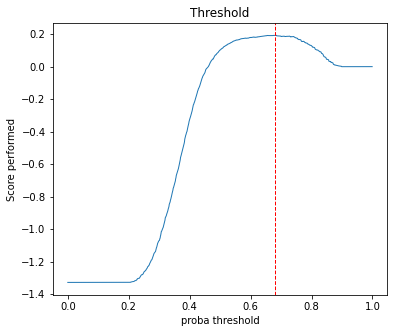

In [64]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [65]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [66]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

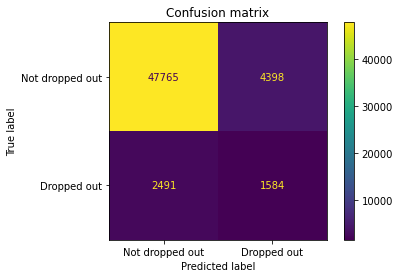

In [67]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

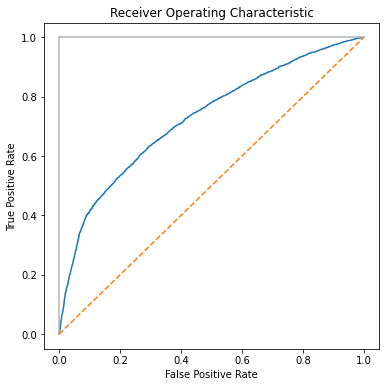

In [68]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

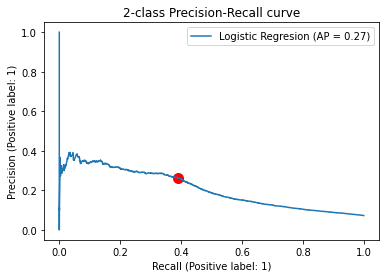

In [69]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Logistic Regresion (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [70]:
df_models_metrics_complete = pd.DataFrame({
    "Model" : ["Class weight - Logistic Regresion"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1


#### 9.1.2. Random Forest

In [71]:
# delete string corresponding to pipeline's name
rfm_parameters = {k.replace("randomforestclassifier__", "") : v for k, v in rfm_parameters.items()}

clf = RandomForestClassifier(**rfm_parameters,
                             class_weight="balanced",
                             random_state=42,
                             n_jobs=-1)

clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [72]:
start_time_model = timeit.default_timer()

clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [73]:
y_prob = clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.605
- Best Score:		 0.231




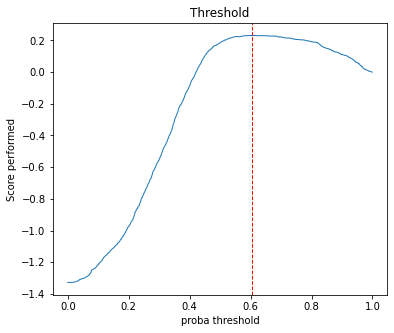

In [74]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [75]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [76]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

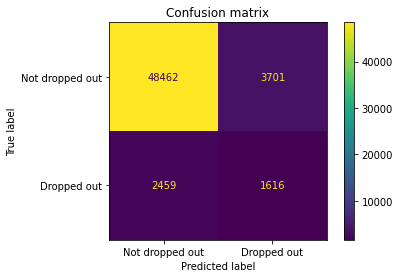

In [77]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

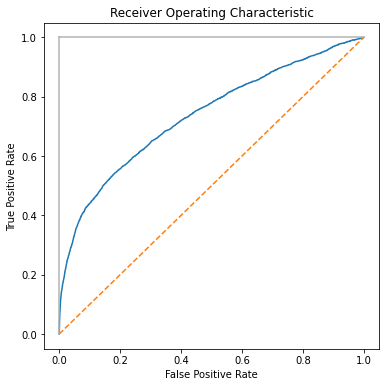

In [78]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

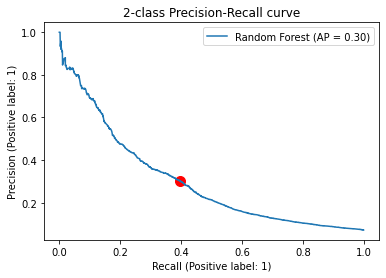

In [79]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [80]:
df_temp  = pd.DataFrame({
    "Model" : ["Class weight - Random Forest"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1


#### 9.1.3. Gradient Boosting

Unfortunately, Gradient Boosting (GBM) doesn't have a parameters call `class_weight` to treat with Imbalanced Class.<br>

But, GBM deals with class imbalance by constructing successive training sets based on incorrectly classified examples

In [81]:
# delete string corresponding to pipeline's name
gbc_parameters = {k.replace("gradientboostingclassifier__", "") : v for k, v in gbc_parameters.items()}

clf = GradientBoostingClassifier(**gbc_parameters,
                                 validation_fraction=0.2, 
                                 n_iter_no_change=5,
                                 random_state=42)

clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [82]:
start_time_model = timeit.default_timer()

clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [83]:
y_prob = clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.076
- Best Score:		 0.208




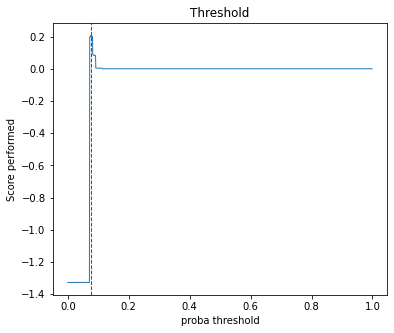

In [84]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [85]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [86]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

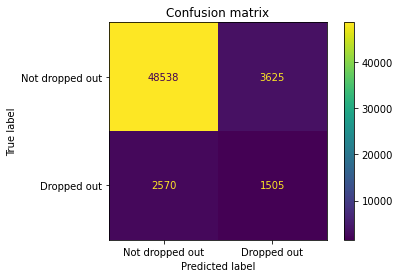

In [87]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

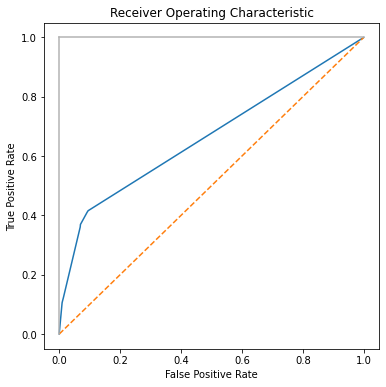

In [88]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

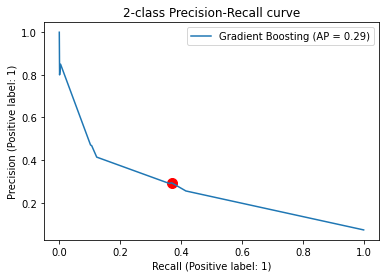

In [89]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [90]:
df_temp  = pd.DataFrame({
    "Model" : ["Tuned - Gradient Boosting"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1


#### 9.1.4. XGBoost

Unfortunately, Gradient Boosting (GBM) doesn't have a parameters call class_weight to treat with Imbalanced Class.<br>
But, the XGBoost documentation suggests a fast way to estimate this value using the training dataset as the total number of examples in the majority class divided by the total number of examples in the minority class.

$$scale\_pos\_weight = \frac{total\_negative\_examples}{total\_positive\_examples}$$

In [91]:
counter = Counter(y_train)
estimate = counter[0] / counter[1]
print("Estimate: %.3f" % estimate)

Estimate: 12.799


In [92]:
# delete string corresponding to pipeline's name
xbgc_parameters = {k.replace("xgbclassifier__", "") : v for k, v in xbgc_parameters.items()}

clf = XGBClassifier(**xbgc_parameters,
                    scale_pos_weight=estimate,
                    random_state=42,
                    n_jobs=-1)

clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [93]:
start_time_model = timeit.default_timer()

clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [94]:
y_prob = clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.632
- Best Score:		 0.23




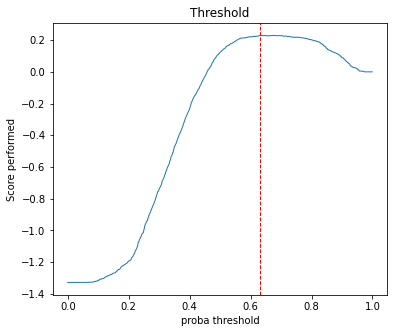

In [95]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [96]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [97]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

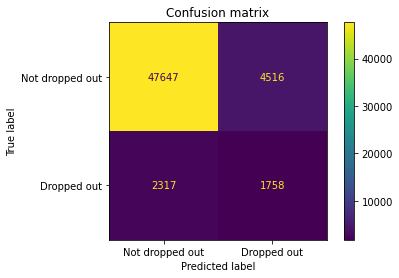

In [98]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

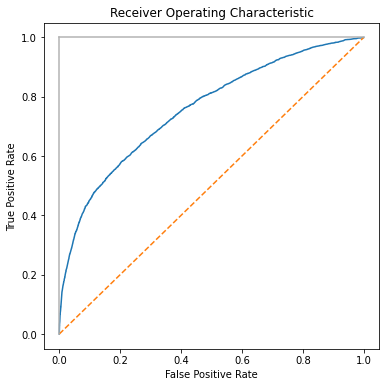

In [99]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

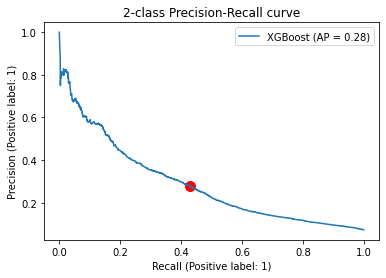

In [100]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["XGBoost (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [101]:
df_temp  = pd.DataFrame({
    "Model" : ["Tuned - XGBoost"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5


### 9.2. Modelisation using OverSampling

To treat the unbalanced class, we are going to implement OverSampling technique with SMOTE.

In [102]:
smote = SMOTE(random_state=42, n_jobs=-1)

#### 9.2.1. Logistic Regresion

In [103]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("lr_imblearn", LogisticRegressionCV(**lr_parameters,
                                         random_state=42,
                                         n_jobs=-1)
    )
])

Executing the model with the complete dataset

In [104]:
start_time_model = timeit.default_timer()

imbpipeline_clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [105]:
y_prob = imbpipeline_clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.6990000000000001
- Best Score:		 0.206




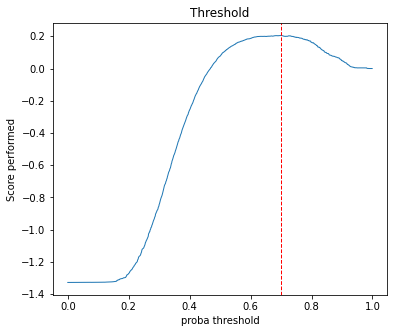

In [106]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [107]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [108]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

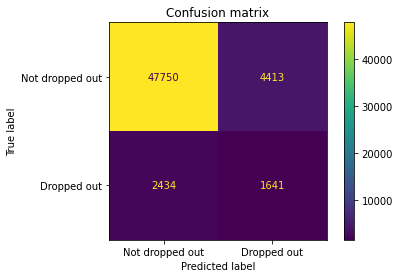

In [109]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

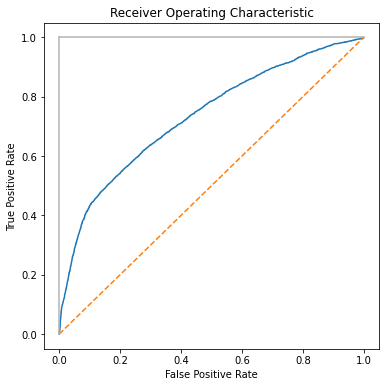

In [110]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

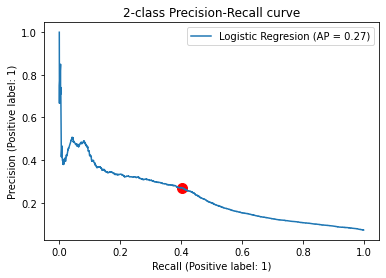

In [111]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Logistic Regresion (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [112]:
df_temp  = pd.DataFrame({
    "Model" : ["OverSampling - Logistic Regresion"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5
4,OverSampling - Logistic Regresion,0.699,0.732,0.915,0.403,0.271,0.324,5.0


#### 9.2.2. Random Forest

In [113]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("rfc_imblearn", RandomForestClassifier(**rfm_parameters,
                                            random_state=42,
                                            n_jobs=-1)
    )
])

Executing the model with the complete dataset

In [114]:
start_time_model = timeit.default_timer()

imbpipeline_clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [115]:
y_prob = imbpipeline_clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.58
- Best Score:		 0.231




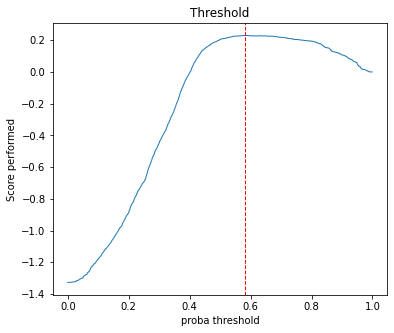

In [116]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [117]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [118]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

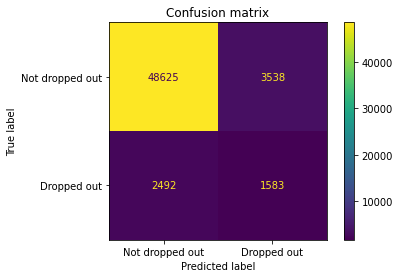

In [119]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

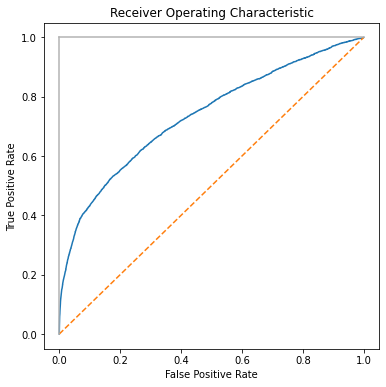

In [120]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

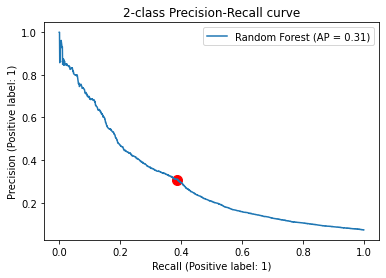

In [121]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Random Forest (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [122]:
df_temp  = pd.DataFrame({
    "Model" : ["OverSampling - Random Forest"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5
4,OverSampling - Logistic Regresion,0.699,0.732,0.915,0.403,0.271,0.324,5.0
5,OverSampling - Random Forest,0.580,0.735,0.932,0.388,0.309,0.344,29.1


#### 9.2.3. Gradient Boosting

In [123]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("gbc_imblearn", GradientBoostingClassifier(**gbc_parameters,
                                                validation_fraction=0.2, 
                                                n_iter_no_change=5,
                                                random_state=42)
    )
])

Executing the model with the complete dataset

In [124]:
start_time_model = timeit.default_timer()

imbpipeline_clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [125]:
y_prob = imbpipeline_clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.508
- Best Score:		 0.192




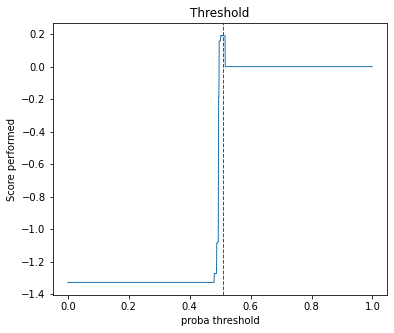

In [126]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [127]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [128]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

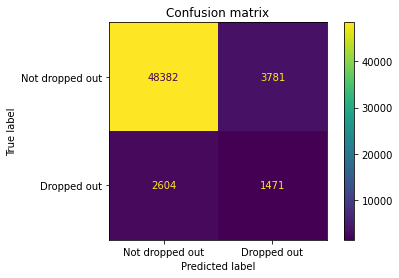

In [129]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

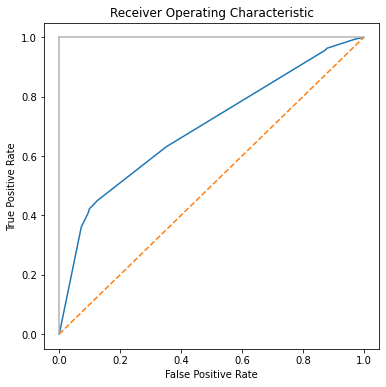

In [130]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

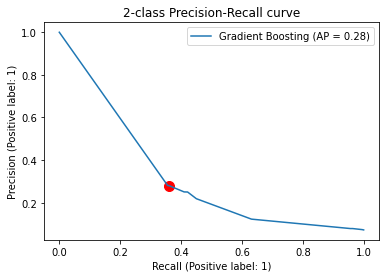

In [131]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Gradient Boosting (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [132]:
df_temp  = pd.DataFrame({
    "Model" : ["OverSampling - Gradient Boosting"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5
4,OverSampling - Logistic Regresion,0.699,0.732,0.915,0.403,0.271,0.324,5.0
5,OverSampling - Random Forest,0.580,0.735,0.932,0.388,0.309,0.344,29.1
6,OverSampling - Gradient Boosting,0.508,0.696,0.928,0.361,0.280,0.315,0.5


#### 9.2.4. XGBoost

In [133]:
imbpipeline_clf = imbpipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("xbgc_imblearn", XGBClassifier(**xbgc_parameters,
                                    random_state=42,
                                    n_jobs=-1)
    )
])

Executing the model with the complete dataset

In [134]:
start_time_model = timeit.default_timer()

imbpipeline_clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Predict the probabilities

In [135]:
y_prob = imbpipeline_clf.predict_proba(X_test)
y_prob = y_prob[:, 1]

Let's selet the threshold based on the best parameters

Best results
- Best Threshold:	 0.539
- Best Score:		 0.222




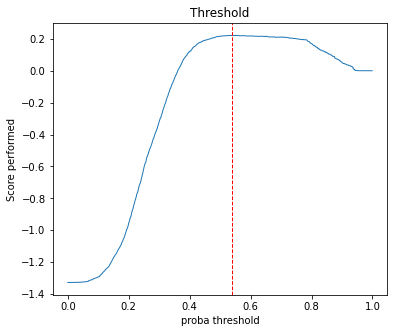

In [136]:
threshold = threshold_selection(y_test, y_prob)

Making the predictions based on the probabilities and threshold

In [137]:
y_pred = (y_prob >= threshold).astype(int)

Now, we can get the metrics

In [138]:
roc_auc = round(roc_auc_score(y_test, y_prob), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

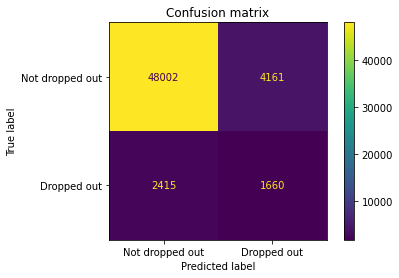

In [139]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

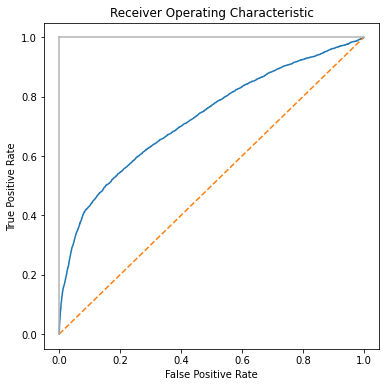

In [140]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

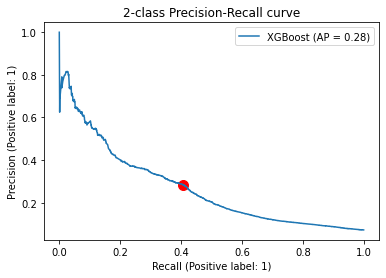

In [141]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["XGBoost (AP = %.2f)"% (precision)], loc=0)
plt.show()

Let's save the metrics to compare against the others models

In [142]:
df_temp  = pd.DataFrame({
    "Model" : ["OverSampling - XGBoost"],
    "Threshold" : threshold,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5
4,OverSampling - Logistic Regresion,0.699,0.732,0.915,0.403,0.271,0.324,5.0
5,OverSampling - Random Forest,0.580,0.735,0.932,0.388,0.309,0.344,29.1
6,OverSampling - Gradient Boosting,0.508,0.696,0.928,0.361,0.280,0.315,0.5
7,OverSampling - XGBoost,0.539,0.727,0.920,0.407,0.285,0.335,0.6


### 9.3. Isolation Forest

As the latest model, we are going to use an Isolation Forest. This type of algorithms uses the numbers of tree splits to identify anomalies or minority classes in an imbalanced dataset (our case).


In [143]:
clf = IsolationForest(n_estimators=10000, random_state=42)

In [144]:
clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [145]:
start_time_model = timeit.default_timer()

clf.fit(X_train[y_train==0], y_train[y_train==0])

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

Change the anomalies' values to make it consistent with the true values

In [146]:
y_pred = np.where(clf.predict(X_test)==-1, 1, 0)

In [147]:
y_score = clf.decision_function(X_test)

Now, we can get the metrics

In [148]:
roc_auc = round(roc_auc_score(y_test, y_score), 3)
recall_0, recall_1 = recall_score(y_test, y_pred, average=None).round(3)
f1 = round(f1_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)

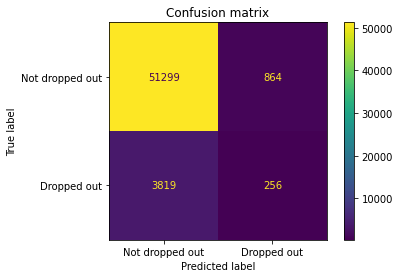

In [149]:
display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                                  display_labels=["Not dropped out", 
                                                                  "Dropped out"])
_ = display.ax_.set_title("Confusion matrix")

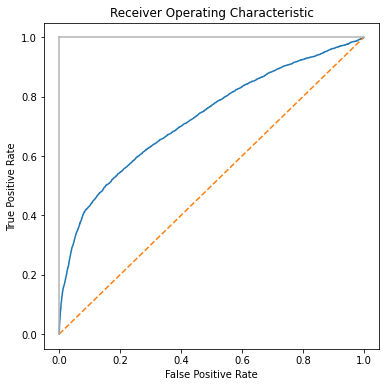

In [150]:
fpr = dict()
tpr = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())

plt.subplots(1, figsize=(6, 6))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr["micro"], tpr["micro"])
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

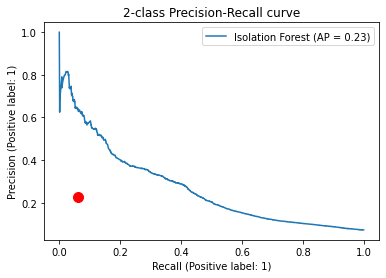

In [151]:
precision_, recall_, thresh_ = precision_recall_curve(y_test, y_prob)

plt.subplots(1, figsize=(6, 4))
plt.plot(recall_, precision_,  color="#1F77B4");
plt.scatter(recall_1, precision, marker="o", s=100, color="red", label="Best")
plt.xlabel("Recall (Positive label: 1)")
plt.ylabel("Precision (Positive label: 1)")
plt.title("2-class Precision-Recall curve")
plt.legend(["Isolation Forest (AP = %.2f)"% (precision)], loc=0)
plt.show()

In [152]:
df_temp  = pd.DataFrame({
    "Model" : ["Isolation Forest"],
    "Threshold" : 0.5,
    "ROC-AUC" : roc_auc,    
    "Recall - 0" : recall_0,
    "Recall - 1" : recall_1,
    "Precision" : precision,
    "F1" : f1,    
    "Duration" : round(end_time_model/60, 1)
})

df_models_metrics_complete = pd.concat([df_models_metrics_complete, df_temp])
df_models_metrics_complete.reset_index(drop=True)

,Model,Threshold,ROC-AUC,Recall - 0,Recall - 1,Precision,F1,Duration
0,Class weight - Logistic Regresion,0.681,0.727,0.916,0.389,0.265,0.315,3.1
1,Class weight - Random Forest,0.605,0.736,0.929,0.397,0.304,0.344,13.1
2,Tuned - Gradient Boosting,0.076,0.665,0.931,0.369,0.293,0.327,0.1
3,Tuned - XGBoost,0.632,0.757,0.913,0.431,0.280,0.340,0.5
4,OverSampling - Logistic Regresion,0.699,0.732,0.915,0.403,0.271,0.324,5.0
5,OverSampling - Random Forest,0.580,0.735,0.932,0.388,0.309,0.344,29.1
6,OverSampling - Gradient Boosting,0.508,0.696,0.928,0.361,0.280,0.315,0.5
7,OverSampling - XGBoost,0.539,0.727,0.920,0.407,0.285,0.335,0.6
8,Isolation Forest,0.500,0.337,0.983,0.063,0.229,0.099,7.4


### 9.4. Analyzing results

Let's plot all metrics

In [153]:
df_temp = df_models_metrics_complete.drop(["Threshold", "Recall - 0", "Duration"], axis=1)

In [154]:
df_temp = pd.melt(df_temp, id_vars="Model", var_name="Metric", value_name="Value")
df_temp.head()

,Model,Metric,Value
0,Class weight - Logistic Regresion,ROC-AUC,0.727
1,Class weight - Random Forest,ROC-AUC,0.736
2,Tuned - Gradient Boosting,ROC-AUC,0.665
3,Tuned - XGBoost,ROC-AUC,0.757
4,OverSampling - Logistic Regresion,ROC-AUC,0.732


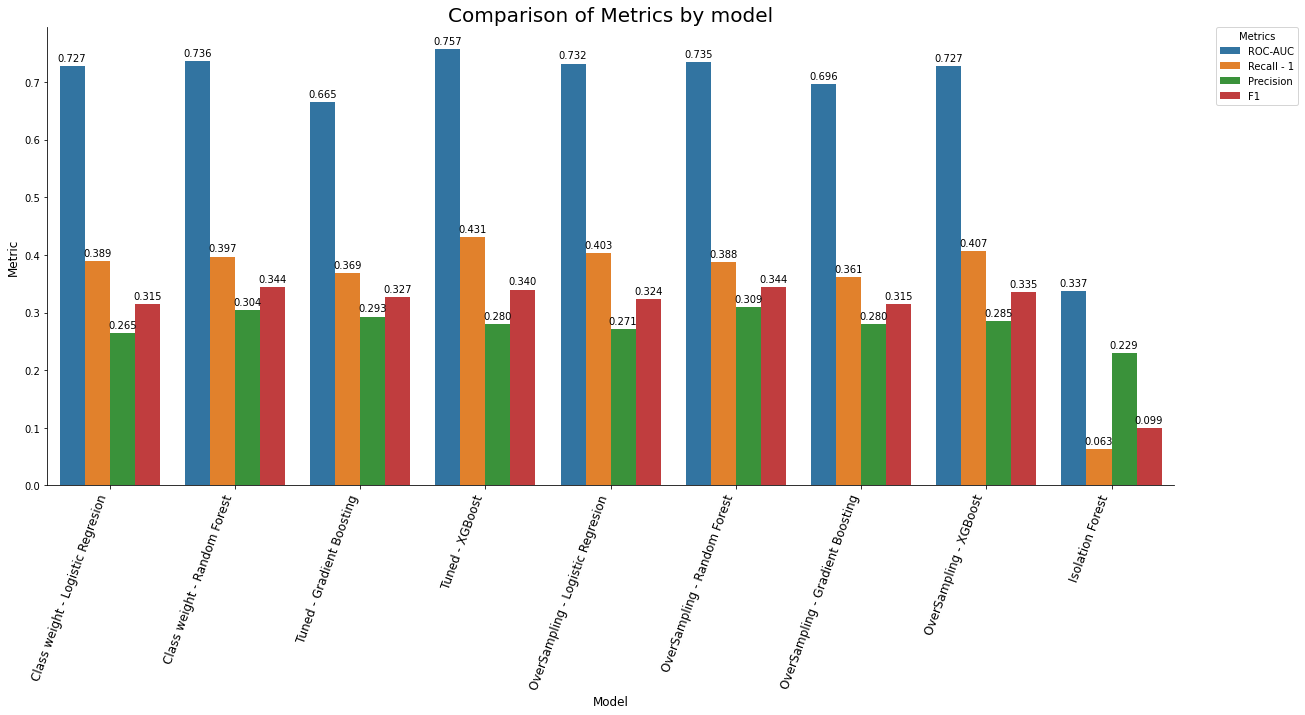

In [155]:
fig, ax1 = plt.subplots(figsize=(18, 10))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_temp, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".3f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plot.set_xticklabels(labels=df_temp["Model"].unique(),
                     rotation=70, size=12, horizontalalignment="right")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.11, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
sns.despine(fig)

<div class="admonition warning alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Observations / Conclusions</p>
    <ul>
        <li>The results are very similar without time comparison</li>
        <li>We can notice a small lift in the OverSampling - Gradient Boosting ROC-ACU results in comparison with Tuned - Gradiend Boosting.<br>But, at the same time, threre was a drop in the Recall - 1</li>
        <li>Recall - 1 in Tuned - Gradiend BoostinXg is a little higher in comparison with the others</li>
    </ul>
<p>To continue with the classification predictions, we are going to work with <b>Tuned - XGBoost</b> because it has the better results to ROC-AUC and Recall - 1</p>
</div>

## 10. Model interpretation

So far, we have analyzed all models and selected who has the best performance. Now, we are going to do the model interpretation based on the model selected (<b>Tuned - XGBoost</b>)

In [157]:
clf = XGBClassifier(**xbgc_parameters,
                    scale_pos_weight=estimate,
                    random_state=42,
                    n_jobs=-1)

clf = make_pipeline(preprocessor, clf)

Executing the model with the complete dataset

In [158]:
start_time_model = timeit.default_timer()

clf.fit(X_train, y_train)

end_time_model =  round(timeit.default_timer() - start_time_model, 3)

### 10.1. Global interpretation

In [161]:
results = permutation_importance(clf, X_train, y_train)

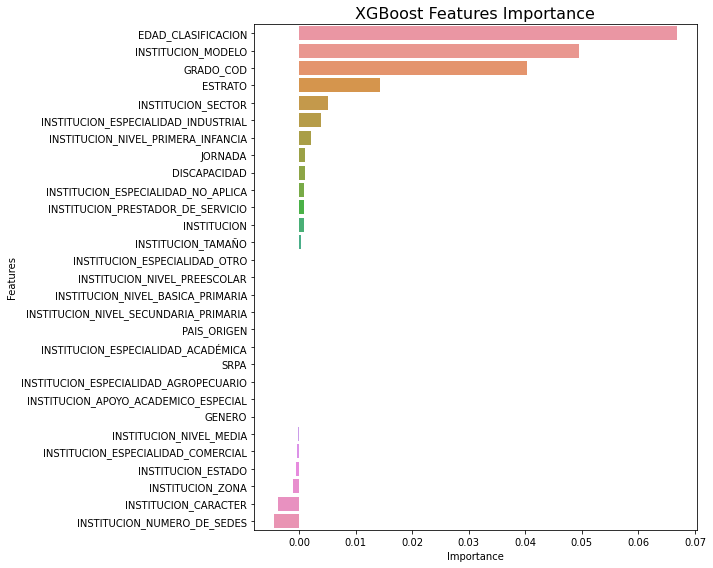

In [162]:
df_importance = pd.DataFrame({
                    "Feature" : X_train.columns,
                    "Importance" : results.importances_mean
                })

df_importance = df_importance.sort_values("Importance", ascending=False)

# Initializing figure    
fig = plt.subplots(figsize=(10, 8))

plot = sns.barplot(data=df_importance, y=df_importance["Feature"], x=df_importance["Importance"])

plt.title("XGBoost Features Importance", fontdict={ "fontsize": 16, "fontweight": "normal" })
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<div class="admonition warning alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Observations / Conclusions</p>
    <ul>
        <li>Most of the features do not add value to the model</li>
        <li>EDAD_CLASIFICACION, INSTITUCION_MODELO y GRADO, are the most important features</li>
    </ul>
</div>

### 10.2. Local interpretation

To make the local interpretation, we are going to use SHAP.

In this case, the model is into a pipeline, so we have to identify it

In [210]:
import xgboost

NameError: name 'pl' is not defined

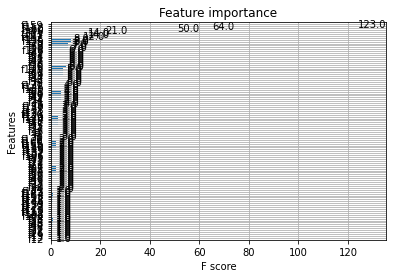

In [212]:
xgboost.plot_importance(clf[1])
pl.title("xgboost.plot_importance(model)")
pl.show()

In [181]:
clf[1]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=10,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [198]:
clf_explainer = shap.TreeExplainer(clf[1])

In [199]:
transformed_data = clf[0].transform(X_test)

In [200]:
clf_shap_values = clf_explainer.shap_values(transformed_data)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [201]:
y_pred[10]

0

In [204]:
shap.force_plot(clf_explainer.expected_value, 
                clf_shap_values[10, :], 
                X_test.iloc[10, :])

Exception: Length of features is not equal to the length of shap_values!

In [206]:
X_test.shape

(56238, 29)

In [205]:
len(clf_shap_values)

56238

In [207]:
clf_shap_values[10, :]

array([-4.4413275e-04, -7.7906839e-04, -2.3969109e-03,  0.0000000e+00,
       -1.1000468e-04,  4.1079996e-03,  0.0000000e+00,  0.0000000e+00,
        2.4646113e-03,  0.0000000e+00,  8.1897210e-03,  0.0000000e+00,
        1.6755950e-04, -3.3641594e-05,  0.0000000e+00, -1.4565072e-02,
        3.4525783e-03,  0.0000000e+00, -8.3336345e-04,  3.6955258e-05,
        1.4508527e-03,  1.9407459e-03, -1.0532499e-04,  4.6108567e-04,
       -1.6864663e-02,  0.0000000e+00, -1.0152461e-04, -1.2415490e-03,
        0.0000000e+00,  0.0000000e+00,  8.4195947e-03,  8.2855043e-04,
        9.7187218e-04, -6.0986434e-03, -5.1411893e-03,  3.2638488e-03,
       -2.4120631e-03,  6.5193500e-04, -4.9960660e-04,  5.3180736e-03,
       -8.0868565e-05,  3.2304656e-02,  3.4154579e-03, -6.7733037e-03,
       -7.1644229e-03,  8.7699984e-05, -1.5330830e-03,  2.6373416e-03,
        8.2589942e-04,  2.0965547e-03, -3.8023391e-03,  5.7528242e-03,
        0.0000000e+00,  1.2164504e-03, -7.6151147e-05,  0.0000000e+00,
      